### Census Income

#### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Description of fnlwgt (final weight)  

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

#### Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### # Data Gathering

In [2]:
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### # Data Pre-processing

In [3]:
data.shape

(32560, 15)

#### Rows : 32560, Columns : 15

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Object columns : 9   
#### int64 columns  : 5


#### Our Target column is 'Income', lets check for the data in the column

In [5]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

#### Observation:  
the Target column is containing categorical data, and specifically Binary data

#### # Getting Null values, white spaces , '-' and 'NA' values in the dataset

In [6]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
data.isin([' ','NA','-']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#### Observations:
1. No Null values in the dataset
2. No white space, NA values or ' - ' in the dataset

#### # getting unique values in each columns

In [8]:
#checking for value counts in each column
for column in data:
    print(data[column].value_counts(),'\n\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64 


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64 


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dt

#### Observations:  

#### Columns having Categorical data:
1. Workclass
2. Education
3. Education_num
4. Marital_status
5. Occupation
6. Relationship
7. Race
8. Sex
9. Native_country
10. Income

#### Columns having Conitions data :  
1. Age
2. Fnlwgt
3. Capital_gain
4. Capital_loss
5. Hours_per_week

#### # Encoding the Object datatype

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
lab=LabelEncoder()

In [12]:
df=lab.fit_transform(data['Workclass'])
pd.Series(df)
data['Workclass']=df

df=lab.fit_transform(data['Education'])
pd.Series(df)
data['Education']=df

df=lab.fit_transform(data['Marital_status'])
pd.Series(df)
data['Marital_status']=df

df=lab.fit_transform(data['Occupation'])
pd.Series(df)
data['Occupation']=df

df=lab.fit_transform(data['Relationship'])
pd.Series(df)
data['Relationship']=df

df=lab.fit_transform(data['Race'])
pd.Series(df)
data['Race']=df

df=lab.fit_transform(data['Sex'])
pd.Series(df)
data['Sex']=df

df=lab.fit_transform(data['Native_country'])
pd.Series(df)
data['Native_country']=df

df=lab.fit_transform(data['Income'])
pd.Series(df)
data['Income']=df

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


#### Converting all the columns to 'float' data type

In [14]:
for column in data:
    data[column]=data[column].astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  float64
 1   Workclass       32560 non-null  float64
 2   Fnlwgt          32560 non-null  float64
 3   Education       32560 non-null  float64
 4   Education_num   32560 non-null  float64
 5   Marital_status  32560 non-null  float64
 6   Occupation      32560 non-null  float64
 7   Relationship    32560 non-null  float64
 8   Race            32560 non-null  float64
 9   Sex             32560 non-null  float64
 10  Capital_gain    32560 non-null  float64
 11  Capital_loss    32560 non-null  float64
 12  Hours_per_week  32560 non-null  float64
 13  Native_country  32560 non-null  float64
 14  Income          32560 non-null  float64
dtypes: float64(15)
memory usage: 3.7 MB


#### Now all the columns are converted to dtype as 'Float64'

In [16]:
data.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
15175,74.0,0.0,292627.0,3.0,2.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,40.0,39.0,0.0
29410,27.0,4.0,279580.0,9.0,13.0,4.0,12.0,1.0,4.0,1.0,10520.0,0.0,45.0,39.0,1.0
11926,36.0,2.0,175255.0,11.0,9.0,2.0,8.0,5.0,4.0,0.0,0.0,0.0,35.0,39.0,0.0
24830,24.0,4.0,321666.0,7.0,12.0,4.0,7.0,3.0,4.0,1.0,0.0,0.0,20.0,39.0,0.0
28264,19.0,4.0,256979.0,11.0,9.0,4.0,3.0,2.0,4.0,1.0,0.0,0.0,35.0,39.0,0.0
2009,31.0,4.0,331065.0,9.0,13.0,4.0,4.0,1.0,4.0,0.0,0.0,1408.0,40.0,39.0,0.0
27527,22.0,4.0,254293.0,2.0,8.0,4.0,6.0,1.0,4.0,1.0,0.0,0.0,40.0,39.0,0.0
19896,29.0,4.0,119004.0,11.0,9.0,2.0,1.0,5.0,4.0,0.0,0.0,2179.0,40.0,39.0,0.0
8911,57.0,4.0,173832.0,9.0,13.0,2.0,12.0,0.0,4.0,1.0,0.0,1902.0,40.0,39.0,1.0
26289,19.0,4.0,389143.0,15.0,10.0,4.0,12.0,3.0,4.0,1.0,0.0,0.0,40.0,39.0,0.0


### # EDA

#### Looking for basic stats

In [17]:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


#### Observations:
1. Column Age: ranges from 17 to 90 where data is distributed around mean as mean and 50% are almost equal
2. Column Workclass : rangest from 0 to 8 where data is also distributed around mean
3. Column Fnlwgt: little tought to analyse as data is in decimal place
4. Column Education : ranges from 0 to 15 and distribution is around mean
5. Column Education_num: ranges from 0 to 16 and is also distrubuted around mean
6. Column Marital_status: rangest from 0 to 6  and having distribution around mean
7. Column Occupation : ranges from 0 to 14 with distribution around mean
8. Column Relationship : ranges from 0 to 5 with distribution around mean
9. Column Race : ranges from 0 to 4 with distribution around mean
10. Column Sex : ranges from 0 to 1 and distribution can not be checked as having  only 2 catagorical values
11. Column Capital_gain : ranges from 0 to 99999 and distribution is not seem to be around mean as the values mean and 50% are not similar
12. Column Capital_loss : ranges from 0 to 4356 and distribution is not seem to be around mean as the values mean and 50% are not similar
13. Column Hours_per_week : ranges from 1 to 99 with distribution around mean
14. Column Native_country : ranges from 1 to 41 with distribution seams to be little skewed
14. Column Income : ranges from 0 to 1 and distribution can not be checked as having only 2 catagorical values



#### # Distplot

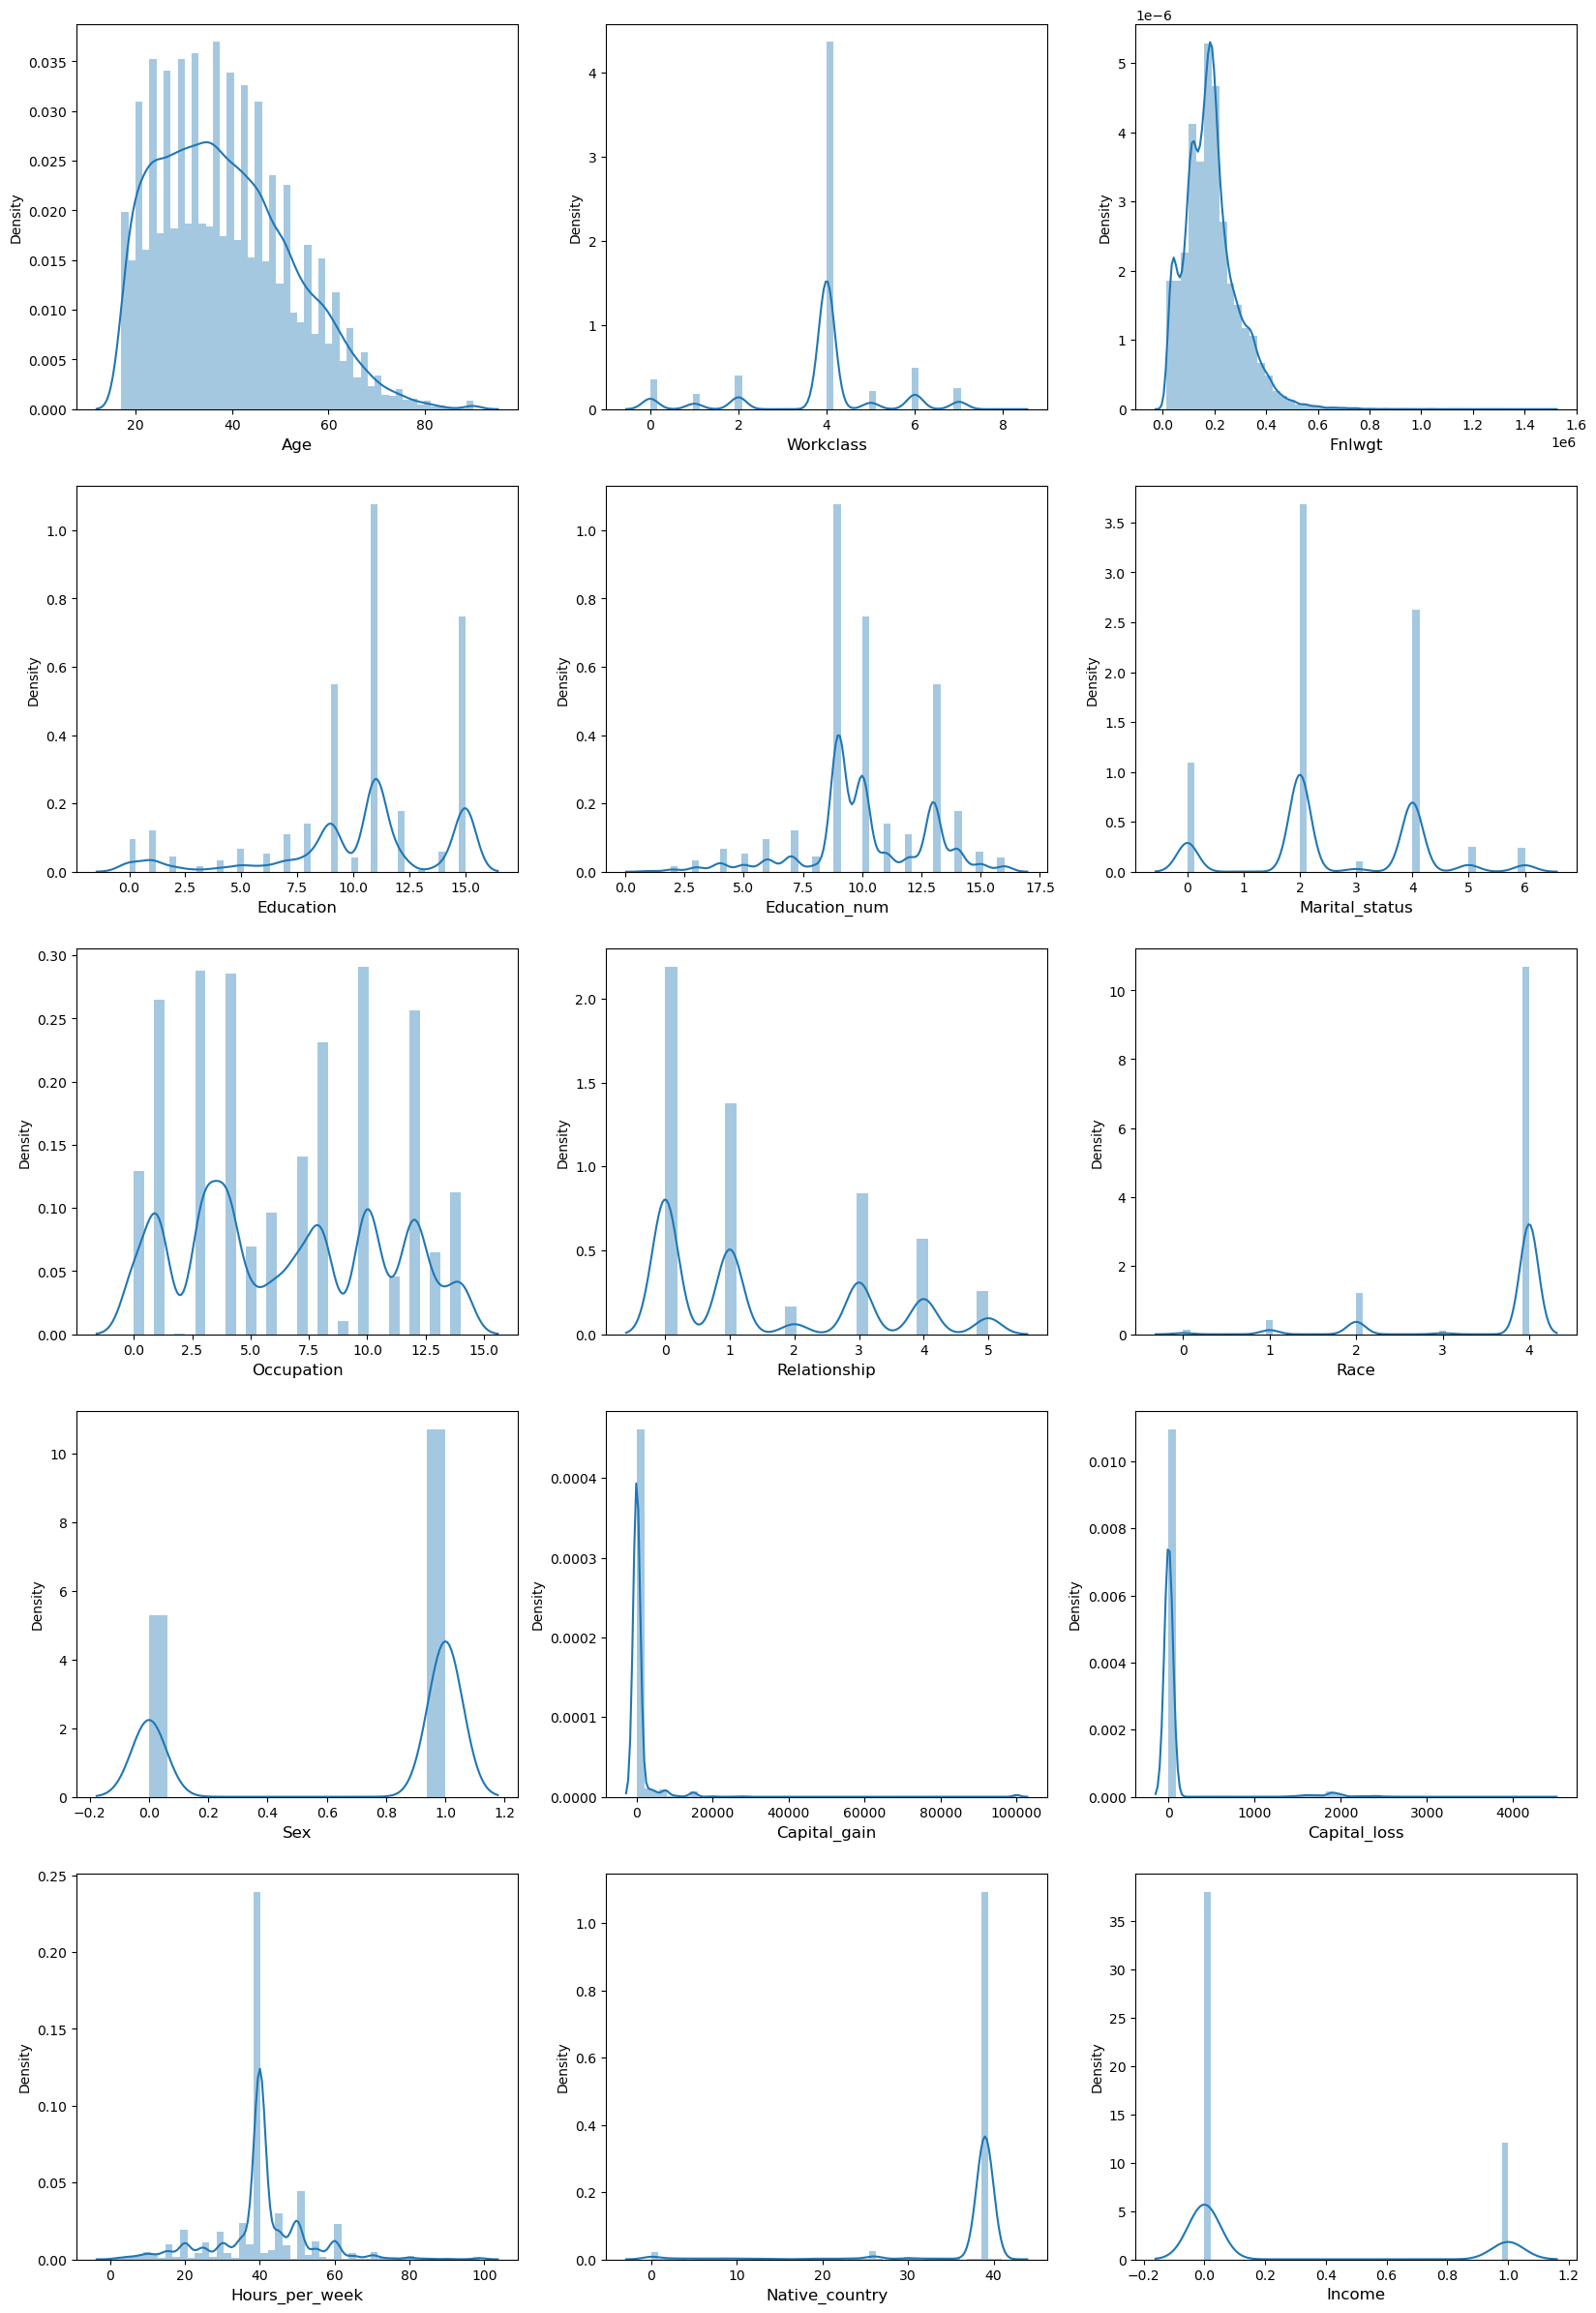

In [18]:
plt.figure(figsize=(20,30))
pltno=1
for column in data:
    if pltno<=15:
        plt.subplot(5,3,pltno)
        sns.distplot(data[column] )
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Observations:
1. skewness on Right side seen for the columns - 'Age', 'fnlwgt', 'Capital_gain', 'Capital_loss'
2. skewness on Left side seen for the columns - 'Education', 'Race', 'Native_country'


#### # Box plot

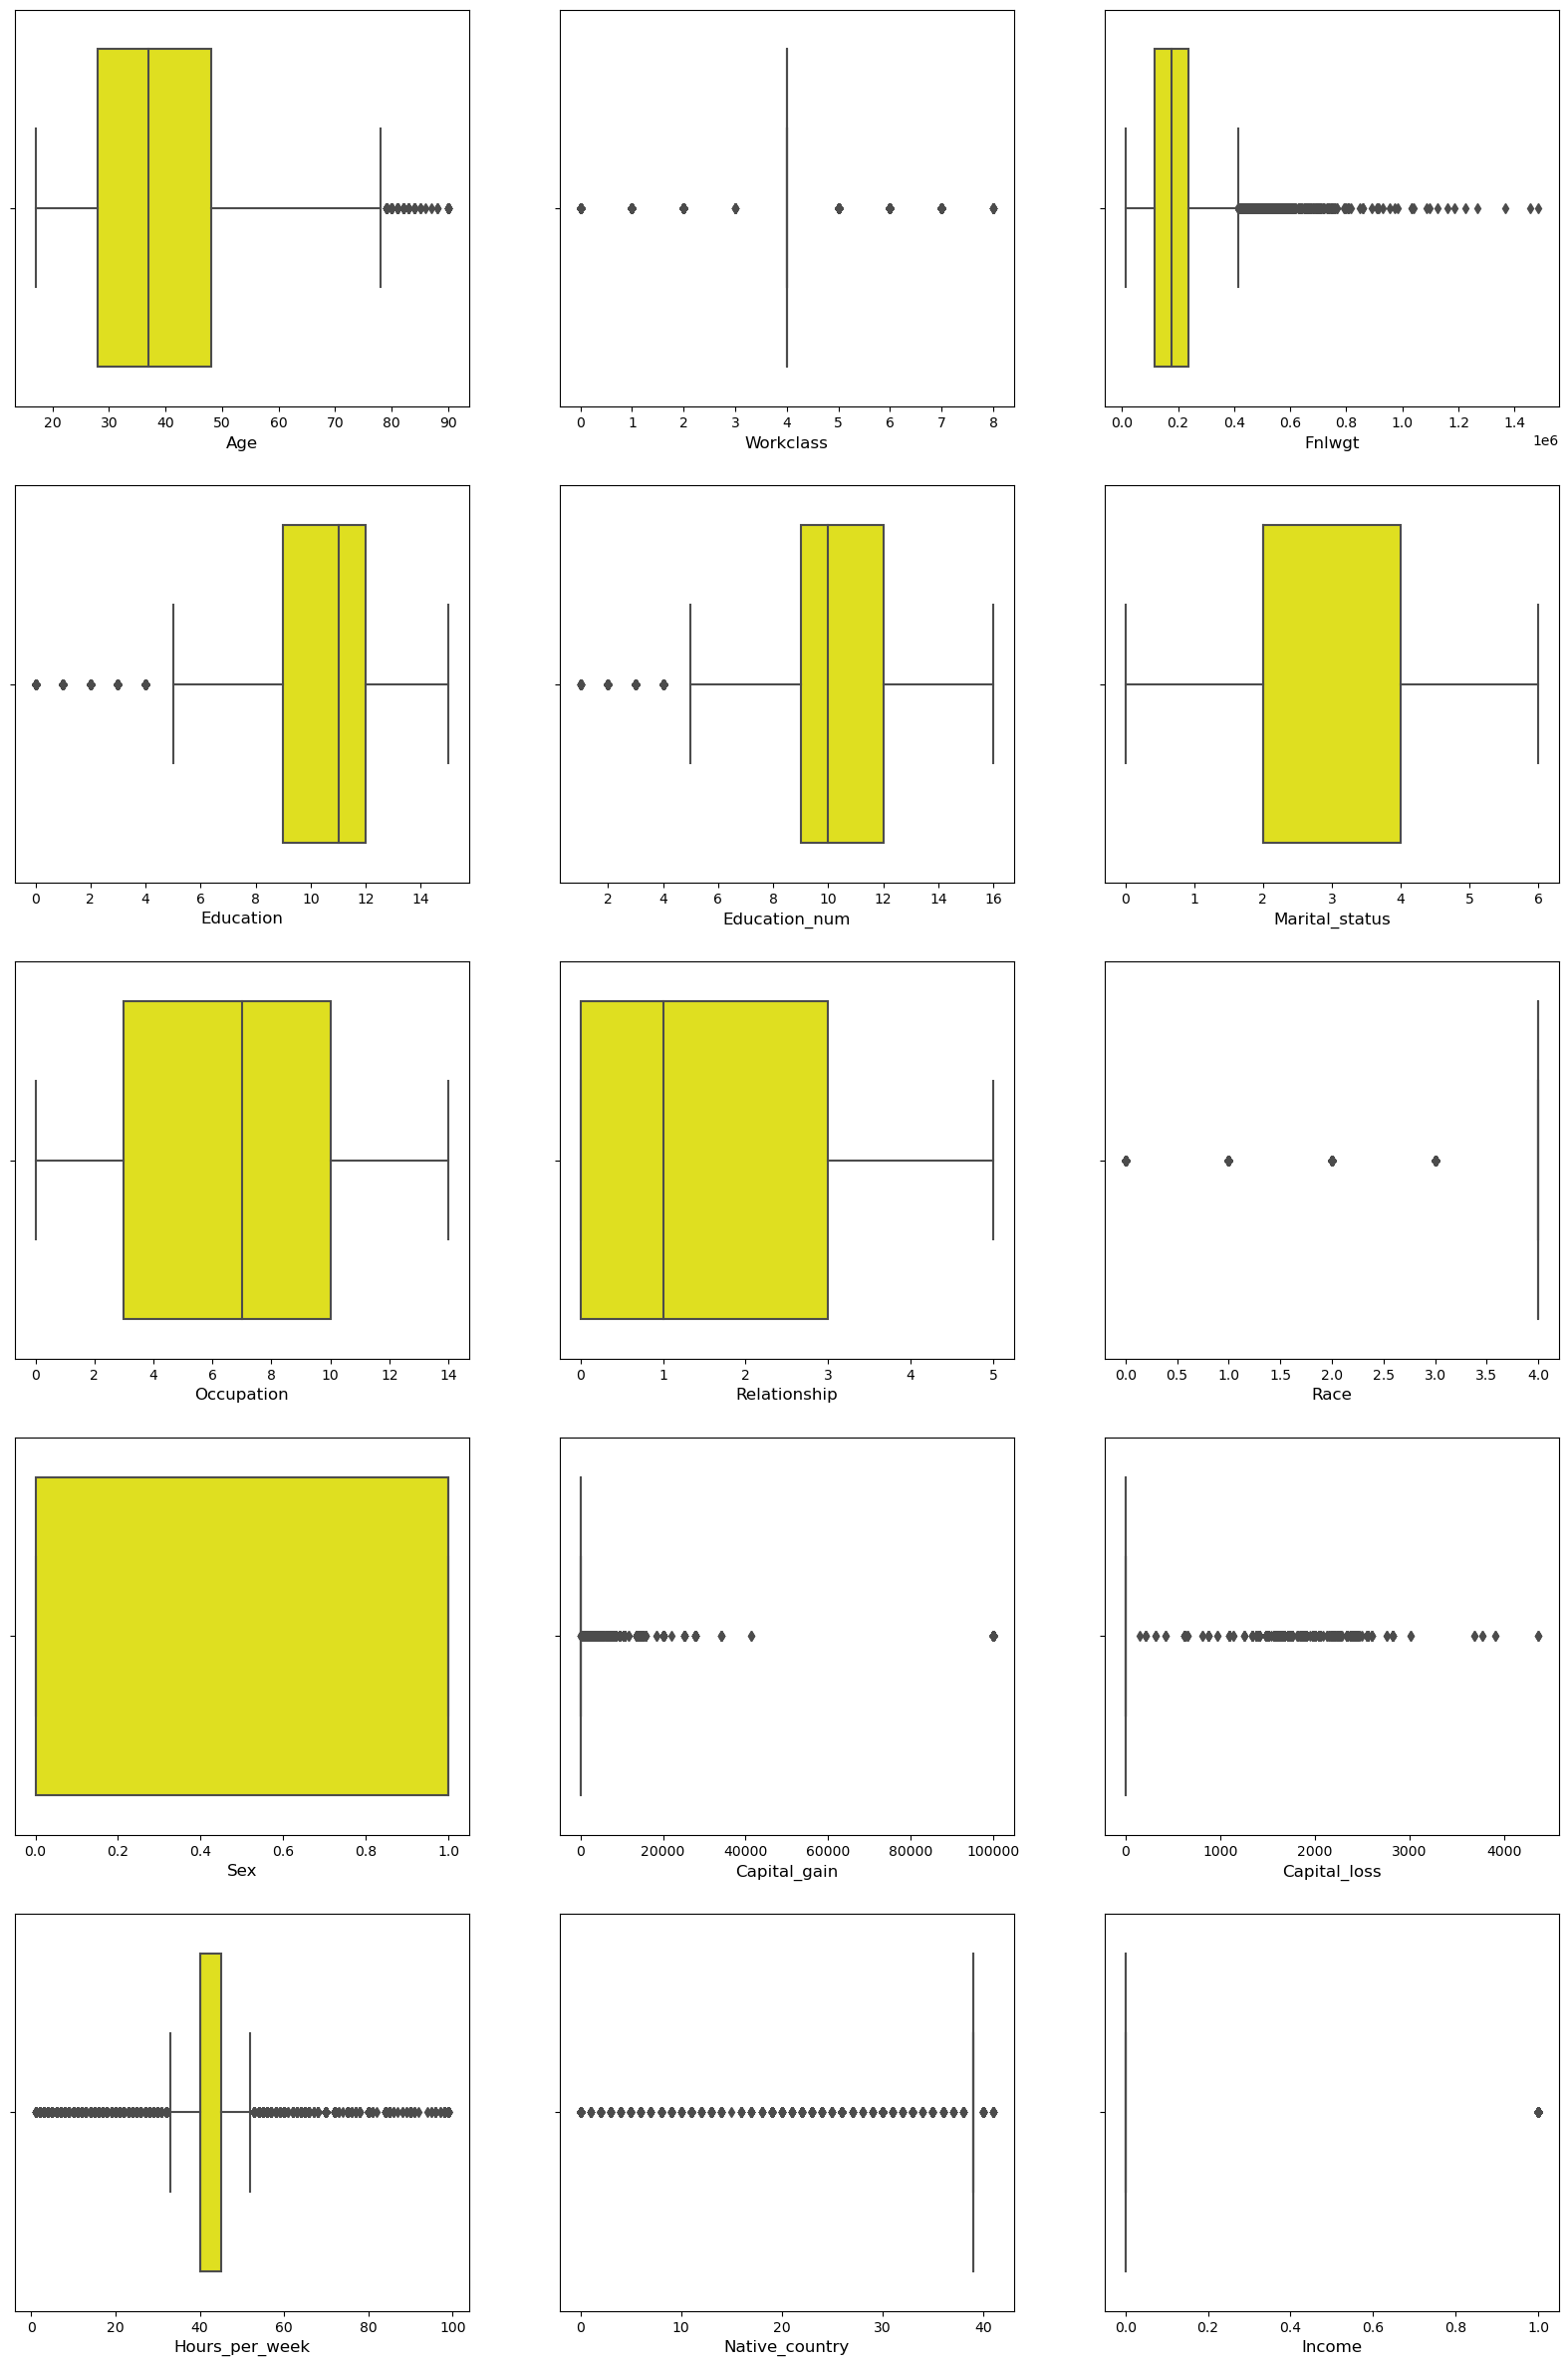

In [19]:
plt.figure(figsize=(20,30))
pltno=1
for column in data:
    if pltno<=15:
        plt.subplot(5,3,pltno)
        sns.boxplot(data[column], color='yellow' )
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Observations:
1. Outliers on Max side for columns : 'Age', 'fnlwgt', 'Capital_gain', 'Capital_loss', 'Income'
2. Outliers on Min side for columns : 'Education', 'Education_num', 'Race'
3. Outliers on Both side for columns : 'Workclass', 'Hours_per_week', 'Native_country'


#### # Checking for Skewness

In [20]:
data.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

#### Observation:
Skewness seen in 'Capital_gain', 'Capital_loss', 'Fnlwgt', rest of the columns are having categorical values hence skewness can be ignored

#### Treating skewness

In [21]:
#Sqrt method
temp=data[['Capital_gain', 'Capital_loss', 'Fnlwgt']]
temp=np.sqrt(temp)
temp.skew()

Capital_gain    5.894949
Capital_loss    4.376279
Fnlwgt          0.189066
dtype: float64

In [22]:
#cbrt method
temp=data[['Capital_gain', 'Capital_loss', 'Fnlwgt']]
temp=np.cbrt(temp)
temp.skew()

Capital_gain    4.100150
Capital_loss    4.336999
Fnlwgt         -0.164177
dtype: float64

In [23]:
# 4th Root method
temp=data[['Capital_gain', 'Capital_loss', 'Fnlwgt']]
temp=np.power(temp, 1/4)
temp.skew()

Capital_gain    3.556495
Capital_loss    4.322084
Fnlwgt         -0.336166
dtype: float64

In [24]:
# 5th Root method
temp=data[['Capital_gain', 'Capital_loss', 'Fnlwgt']]
temp=np.power(temp, 1/5)
temp.skew()

Capital_gain    3.336438
Capital_loss    4.314676
Fnlwgt         -0.438389
dtype: float64

In [25]:
# 6th Root method
temp=data[['Capital_gain', 'Capital_loss', 'Fnlwgt']]
temp=np.power(temp, 1/6)
temp.skew()

Capital_gain    3.227650
Capital_loss    4.310426
Fnlwgt         -0.506219
dtype: float64

#### Not much reducing so we will stick to 5th Root method

In [26]:
data['Capital_gain']=np.power(data['Capital_gain'], 1/5)
data['Capital_loss']=np.power(data['Capital_loss'], 1/5)
data['Fnlwgt']=np.power(data['Fnlwgt'], 1/5)
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50.0,6.0,9.641408,9.0,13.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13.0,39.0,0.0
1,38.0,4.0,11.661335,11.0,9.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40.0,39.0,0.0
2,53.0,4.0,11.860702,1.0,7.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40.0,39.0,0.0
3,28.0,4.0,12.761108,9.0,13.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40.0,5.0,0.0
4,37.0,4.0,12.326548,12.0,14.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40.0,39.0,0.0


#### # Again plotting dist plot

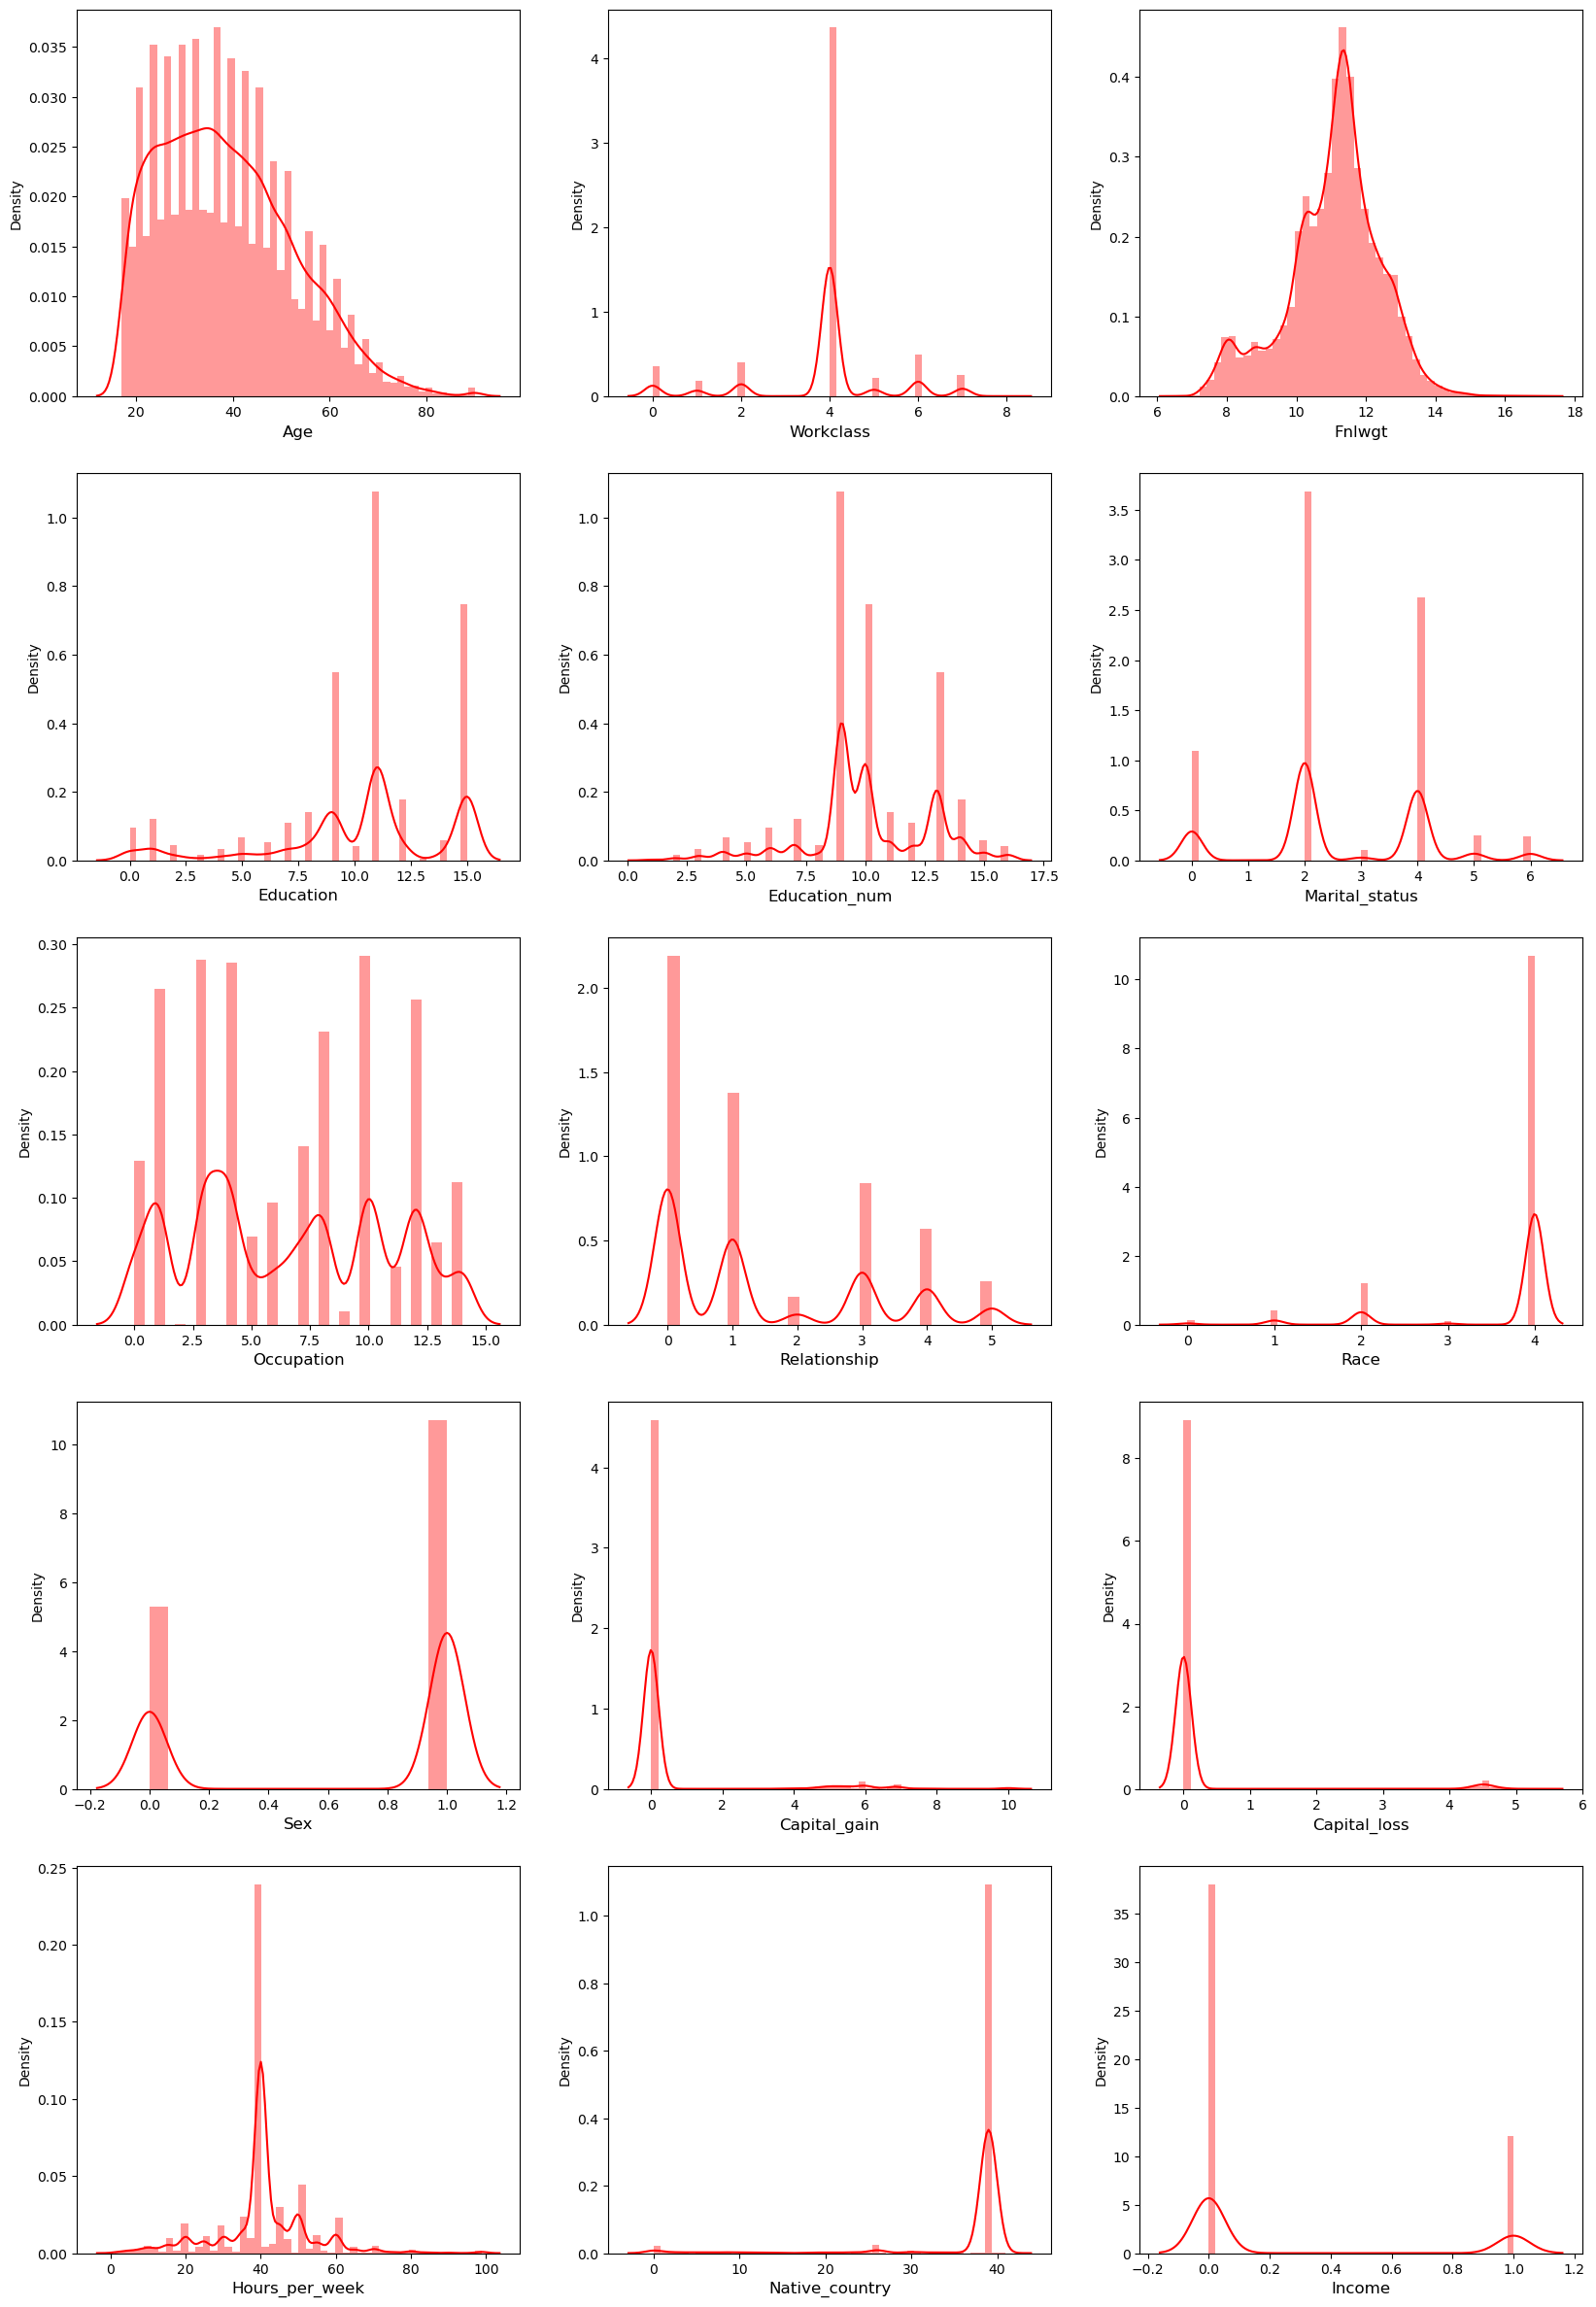

In [27]:
plt.figure(figsize=(20,30))
pltno=1
for column in data:
    if pltno<=15:
        plt.subplot(5,3,pltno)
        sns.distplot(data[column], color='red' )
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

In [28]:
data.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt           -0.438389
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.336438
Capital_loss      4.314676
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

#### # Observation:
still having skewness in data, but we have to move forward as it is

### # Multi-corelation heatmap

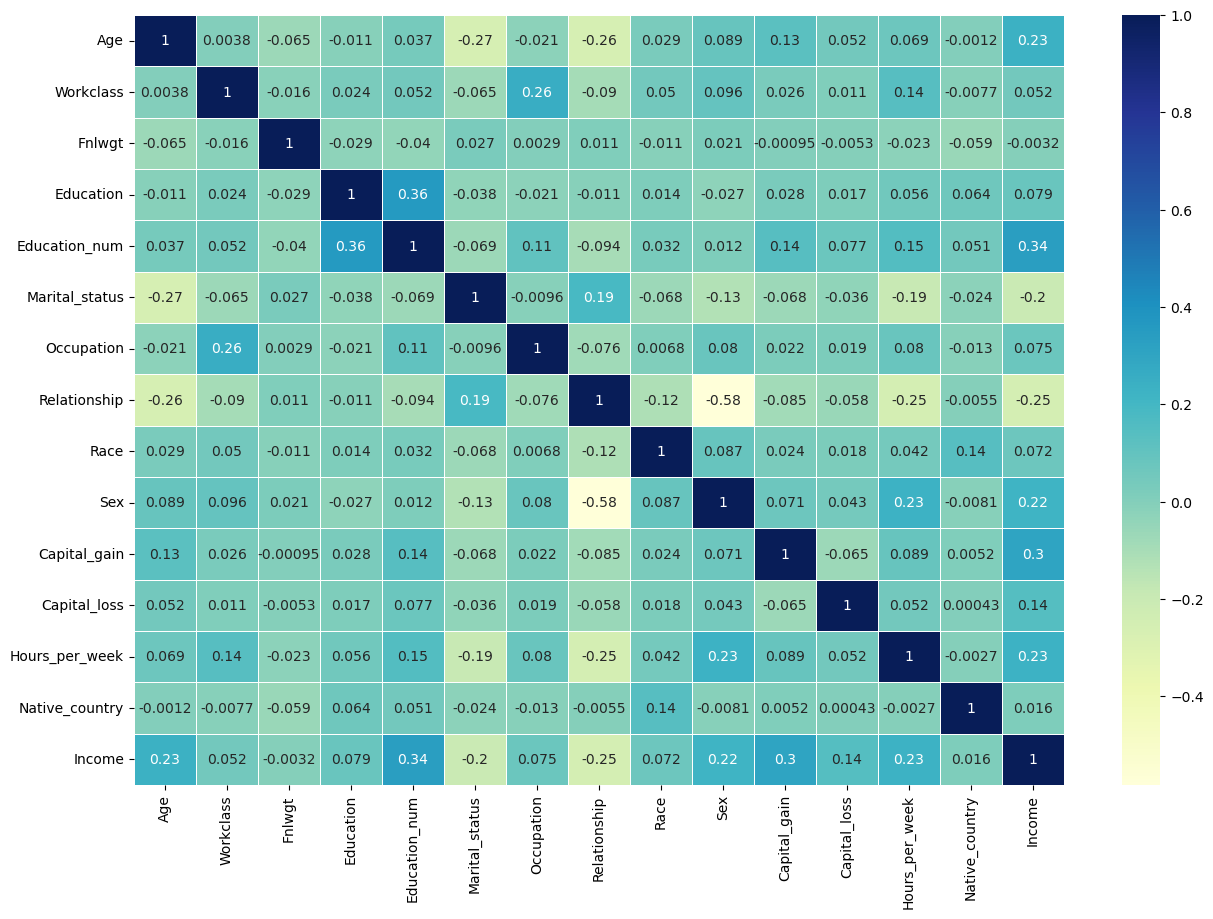

In [29]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)
plt.show()

#### # Observation:
1. No Multi co-linearity seen in data

Hence proceeding with the same data

#### Check for imbalance in the data for our target column

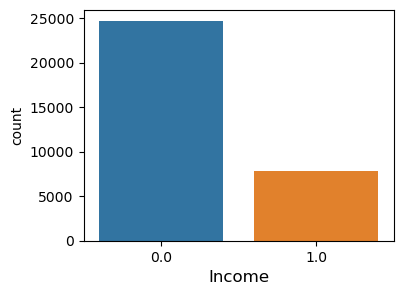

In [30]:
plt.figure(figsize=(4,3))
sns.countplot(data['Income'])
plt.xlabel('Income', fontsize=12)
plt.show()

#### Observation : As we can see from the graph the Target column is having imbalance in the data

### # Using Oversampling Method for balancing the data

In [31]:
from imblearn.over_sampling import SMOTE
X=data.drop(['Income'], axis=1)
y=data['Income']

sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [32]:
y1.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

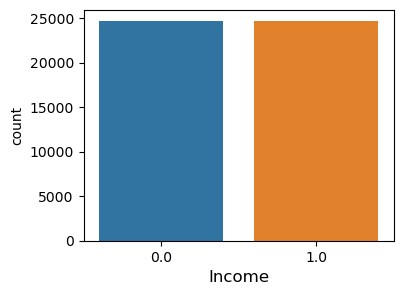

In [33]:
plt.figure(figsize=(4,3))
sns.countplot(y1)
plt.xlabel('Income', fontsize=12)
plt.show()

#### Now we are having equal samples for data

### # Model buliding

In [34]:
# Importing all other libraries for modeling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [35]:
X=x1
y=y1
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50.0,6.0,9.641408,9.0,13.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13.0,39.0
1,38.0,4.0,11.661335,11.0,9.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40.0,39.0
2,53.0,4.0,11.860702,1.0,7.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40.0,39.0
3,28.0,4.0,12.761108,9.0,13.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40.0,5.0
4,37.0,4.0,12.326548,12.0,14.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40.0,39.0


In [36]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Income, dtype: float64

#### # Standard Scaler

In [37]:
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X) , columns=X.columns)

X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.736418,1.514435,-1.152005,-0.417561,0.924105,-0.325087,-0.666428,-0.732092,0.365436,0.605973,-0.37644,-0.258121,-2.413258,0.282627
1,-0.194290,0.057244,0.467921,0.150852,-0.625736,-1.853420,-0.185995,-0.105669,0.365436,0.605973,-0.37644,-0.258121,-0.177262,0.282627
2,0.969095,0.057244,0.627807,-2.691213,-1.400656,-0.325087,-0.185995,-0.732092,-2.228757,0.605973,-0.37644,-0.258121,-0.177262,0.282627
3,-0.969881,0.057244,1.349908,-0.417561,0.924105,-0.325087,0.774871,2.400024,-2.228757,-1.698942,-0.37644,-0.258121,-0.177262,-4.079736
4,-0.271849,0.057244,1.001403,0.435058,1.311565,-0.325087,-0.666428,2.400024,0.365436,-1.698942,-0.37644,-0.258121,-0.177262,0.282627


#### # Test train split

In [38]:
# Random Forest Classifier
rs=0
max_acc=0
for i in range(50):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    print('working at random state : ', i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy > max_acc:
        max_acc=accuracy
        rs=i
print("Max accuracy score : ", max_acc, "   , at Random state : ", rs)

working at random state :  0
working at random state :  1
working at random state :  2
working at random state :  3
working at random state :  4
working at random state :  5
working at random state :  6
working at random state :  7
working at random state :  8
working at random state :  9
working at random state :  10
working at random state :  11
working at random state :  12
working at random state :  13
working at random state :  14
working at random state :  15
working at random state :  16
working at random state :  17
working at random state :  18
working at random state :  19
working at random state :  20
working at random state :  21
working at random state :  22
working at random state :  23
working at random state :  24
working at random state :  25
working at random state :  26
working at random state :  27
working at random state :  28
working at random state :  29
working at random state :  30
working at random state :  31
working at random state :  32
working at random st

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=rs)
x_test

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
11255,-1.590353,0.057244,0.535198,1.287678,-0.238276,1.203246,0.294438,1.147178,0.365436,0.605973,-0.376440,-0.258121,-0.177262,0.282627
4427,1.356890,0.057244,0.490665,-0.417561,0.924105,-0.325087,-1.387078,-0.732092,0.365436,0.605973,-0.376440,-0.258121,-0.177262,-1.385336
46916,1.299405,0.902987,-1.328835,0.333638,0.086886,0.118430,-0.627805,-0.368520,0.365436,-0.731784,2.918916,-0.258121,-1.833555,0.282627
36416,1.822244,-0.275317,1.230161,-2.778951,-1.520270,-0.325087,-0.832487,-0.732092,-1.427899,0.605973,-0.376440,-0.258121,-0.177262,0.282627
41671,0.115064,0.057244,0.076265,-0.417561,0.924105,-0.325087,-0.669158,-0.732092,0.365436,0.605973,-0.376440,-0.258121,-0.177262,0.282627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,1.201772,0.057244,0.078664,-2.407007,-1.013196,-0.325087,-0.906645,-0.732092,0.365436,0.605973,-0.376440,-0.258121,-0.177262,-1.898555
31735,-1.435235,0.057244,1.415349,-0.417561,0.924105,1.203246,-0.666428,1.147178,0.365436,-1.698942,-0.376440,-0.258121,-1.005409,0.282627
41408,0.736418,0.057244,0.492077,0.150852,-0.625736,-0.325087,-0.906645,-0.732092,0.365436,0.605973,-0.376440,-0.258121,-0.177262,0.282627
9744,-1.667912,0.057244,-2.601348,1.287678,-0.238276,1.203246,0.294438,1.147178,0.365436,-1.698942,-0.376440,-0.258121,-1.833555,0.282627


In [40]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfc_y_pred=rf.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,rfc_y_pred)* 100,' %' )
print("\n confusion_matrix  : \n", confusion_matrix(y_test,rfc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,rfc_y_pred))

accuracy_score : 90.69579288025889  %

 confusion_matrix  : 
 [[5520  592]
 [ 558 5690]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.91      6112
         1.0       0.91      0.91      0.91      6248

    accuracy                           0.91     12360
   macro avg       0.91      0.91      0.91     12360
weighted avg       0.91      0.91      0.91     12360



In [41]:
#Support Vector Classifier
svc=SVC()
svc.fit(x_train, y_train)
svc_y_pred=svc.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,svc_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,svc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,svc_y_pred))

accuracy_score : 84.98381877022653  %

 confusion_matrix  : 
 [[4865 1247]
 [ 609 5639]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      6112
         1.0       0.82      0.90      0.86      6248

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360



In [42]:
#Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_y_pred=gb.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,gb_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,gb_y_pred))
print("\n classification_report  : \n", classification_report(y_test,gb_y_pred))

accuracy_score : 88.23624595469256  %

 confusion_matrix  : 
 [[5252  860]
 [ 594 5654]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      6112
         1.0       0.87      0.90      0.89      6248

    accuracy                           0.88     12360
   macro avg       0.88      0.88      0.88     12360
weighted avg       0.88      0.88      0.88     12360



In [43]:
#AdaBoost Classifier
ab=AdaBoostClassifier()
ab.fit(x_train, y_train)
ab_y_pred=ab.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,ab_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,ab_y_pred))
print("\n classification_report  : \n", classification_report(y_test,ab_y_pred))

accuracy_score : 86.75566343042071  %

 confusion_matrix  : 
 [[5195  917]
 [ 720 5528]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      6112
         1.0       0.86      0.88      0.87      6248

    accuracy                           0.87     12360
   macro avg       0.87      0.87      0.87     12360
weighted avg       0.87      0.87      0.87     12360



In [44]:
#Bagging Classifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)
bag_y_pred=bag.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,bag_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,bag_y_pred))
print("\n classification_report  : \n", classification_report(y_test,bag_y_pred))

accuracy_score : 89.126213592233  %

 confusion_matrix  : 
 [[5511  601]
 [ 743 5505]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      6112
         1.0       0.90      0.88      0.89      6248

    accuracy                           0.89     12360
   macro avg       0.89      0.89      0.89     12360
weighted avg       0.89      0.89      0.89     12360



In [45]:
#Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_y_pred=et.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,et_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,et_y_pred))
print("\n classification_report  : \n", classification_report(y_test,et_y_pred))


accuracy_score : 90.96278317152104  %

 confusion_matrix  : 
 [[5482  630]
 [ 487 5761]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      6112
         1.0       0.90      0.92      0.91      6248

    accuracy                           0.91     12360
   macro avg       0.91      0.91      0.91     12360
weighted avg       0.91      0.91      0.91     12360



In [46]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,lr_y_pred)* 100,' %')
print("\n confusion_matrix  : \n", confusion_matrix(y_test,lr_y_pred))
print("\n classification_report  : \n", classification_report(y_test,lr_y_pred))


accuracy_score : 77.70226537216828  %

 confusion_matrix  : 
 [[4733 1379]
 [1377 4871]]

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      6112
         1.0       0.78      0.78      0.78      6248

    accuracy                           0.78     12360
   macro avg       0.78      0.78      0.78     12360
weighted avg       0.78      0.78      0.78     12360



#### So, the best accuracy scores is 90.75 % with 'Random Forest Classifier'

### # Cross validation score

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
#Cross validation for Random forest classifier
cv_score = cross_val_score(rf,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Random forest classifier : ', (accuracy_score(y_test,rfc_y_pred)-cv_score.mean()))

[0.81078074 0.87267395 0.93365696 0.93749368 0.93719025] 

Average CV Score 89.83591157752505   %
difference in score Random forest classifier :  0.008598813027338448


In [49]:
#Cross validation for support vector classifier
cv_score = cross_val_score(svc,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score support vector classifier : ', (accuracy_score(y_test,svc_y_pred)-cv_score.mean()))

[0.81634304 0.8288835  0.85315534 0.85516335 0.85678163] 

Average CV Score 84.20653710553853   %
difference in score support vector classifier :  0.00777281664688001


In [50]:
#Cross validation for Gradient Boosting classifier
cv_score = cross_val_score(gb,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Gradient Boosting classifier :  ', (accuracy_score(y_test,gb_y_pred)-cv_score.mean()))

[0.80926375 0.85598706 0.89724919 0.89784566 0.89541823] 

Average CV Score 87.11527763730149   %
difference in score Gradient Boosting classifier :   0.01120968317391069


In [51]:
#Cross validation for AdaBoost classifier
cv_score = cross_val_score(ab,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score AdaBoost classifier : ', (accuracy_score(y_test,ab_y_pred)-cv_score.mean()))

[0.80976942 0.84769417 0.8808657  0.88803479 0.87974107] 

Average CV Score 86.1221031065277   %
difference in score AdaBoost classifier :  0.006335603238930121


In [52]:
#Cross validation for Bagging classifier
cv_score = cross_val_score(bag,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Bagging classifier : ', (accuracy_score(y_test,bag_y_pred)-cv_score.mean()))

[0.77690129 0.85275081 0.92212783 0.93263882 0.92586224] 

Average CV Score 88.20561994551376   %
difference in score Bagging classifier :  0.009205936467192477


In [53]:
#Cross validation for Extratree classifier
cv_score = cross_val_score(et,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Extratree classifier : ', (accuracy_score(y_test,et_y_pred)-cv_score.mean()))

[0.84375    0.87914644 0.93416262 0.93617882 0.93385253] 

Average CV Score 90.54180831584608   %
difference in score Extratree classifier :  0.004209748556749493


In [54]:
#Cross validation for Logistic Regression
cv_score = cross_val_score(lr,X,y,cv=5,scoring='accuracy')
print(cv_score, '\n')
print('Average CV Score', cv_score.mean()*100,'  %')
print('difference in score Linear Regression : ', (accuracy_score(y_test,lr_y_pred)-cv_score.mean()))

[0.75839401 0.76961974 0.77750809 0.77697987 0.77081015] 

Average CV Score 77.06623743937563   %
difference in score Linear Regression :  0.006360279327926599


#### Average Cross Val score for ' Extra Trees classifier ' is  90.67 % and difference in score for Prediction done earlier and avg CV score for ' Extra Trees classifier ' is -0.0010 or 0.1% 

#### Observation:
1. Before Cross validation we found 'Random forest Classifier' to be having best Accuracy score of 90.75%
2. After Cross validation we found 'Random Forest Classifier' is having Average CV Score of 90.07% with difference in earlier accuracy score and average cv score is 0.0067 or 0.67%.
3. However After Cross Validation we found 'Extra Trees classifier' is having average CV score of 90.67% and difference in earlier accuracy score and average cv score is 0.0010 or 0.1%.

----------------------------------------------------------------------------------------------------------------  
----------------------------------------------------------------------------------------------------------------
#### #so taking the highest Avg CV score in consideration we select 'Extra Trees Classifier' as our final model

### # Hyper Parameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
params={'criterion':['gini','entropy'],
        'min_samples_split' : [2,3,5],
       'min_samples_leaf' : [1,2,3],
        'max_features' : ['sqrt', 'log2', 'None'],
        'n_jobs' : [-2,-1,1]        
       }


In [62]:
grid_search = GridSearchCV(estimator=ExtraTreesClassifier(),param_grid=params,cv=3)

In [63]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'n_jobs': [-2, -1, 1]})

In [64]:
print('Best Score  : ',grid_search.best_score_)
print('\nBest Parameters : ', grid_search.best_params_)

Best Score  :  0.8939263762555543

Best Parameters :  {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_jobs': -1}


In [56]:
#Final Model

Final_Model=ExtraTreesClassifier(criterion='entropy',max_features='log2', min_samples_leaf=1, min_samples_split=3, n_jobs=-1)

Final_Model.fit(x_train,y_train)
Final_Model_y_pred=Final_Model.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,Final_Model_y_pred))
print("\n classification_report  : \n", classification_report(y_test,Final_Model_y_pred))

accuracy_score : 0.9105177993527508

 classification_report  : 
               precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      6112
         1.0       0.90      0.93      0.91      6248

    accuracy                           0.91     12360
   macro avg       0.91      0.91      0.91     12360
weighted avg       0.91      0.91      0.91     12360



### # Confusion Matrix

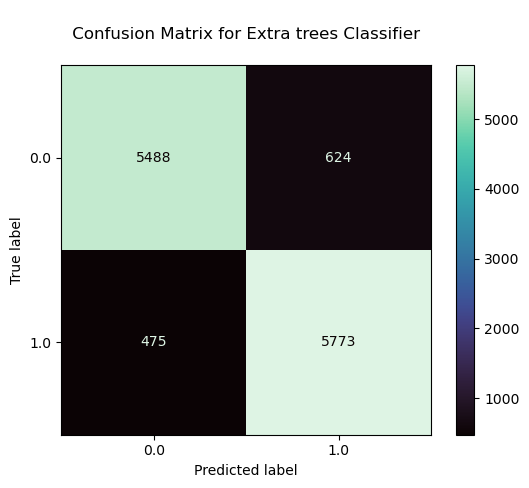

In [57]:
from sklearn import metrics

class_names = data.columns
metrics.plot_confusion_matrix(Final_Model.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\n Confusion Matrix for Extra trees Classifier \n')
plt.show()

### # Saving Model

In [67]:
#saving the model
import pickle
pickle.dump(Final_Model, open('Census_Income_predication.pkl', 'wb'))

In [69]:
#load model
load_model=pickle.load(open('Census_Income_predication.pkl', 'rb'))
prediction = load_model.predict(x_test)
prediction

array([1., 1., 1., ..., 1., 0., 0.])

In [70]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction

df.sample(10)

,Actual,predicted
5551,0.0,0.0
49149,1.0,1.0
25979,0.0,0.0
9990,0.0,0.0
1122,0.0,1.0
45304,1.0,1.0
6848,1.0,0.0
43929,1.0,1.0
46424,1.0,1.0
12281,0.0,0.0


### Final comments

The model is successfully predicting whether a person makes over $50K a year or Not.  
Prediction is by using Extra Trees Classifier as final model with accuracy of 90.5%.  